### This code takes 2 folder for task complexTone vs everyday Sound and complexTone vs catSound
for each pth (one for task complexTone vs everyday Sound; one for complexTone vs catSound), there are four csv files 2 for PA, 2 for for SD
- PA_correctness_complexTone
- PA_correctness_other
- SD_correctness_complexTone
- SD_correctness_other

name with complex tone represent the complex tone category; name with other represent the everyday or cat based on the pth it is in;
make 2 plots one for same different and one for present absent
for each plot it has four categories use the green for everydaysound; blue for catsound; lightcoral for complextone with everydaysound; darkred for complextone with catsound
for each plot have 2 axis: x axis to be the serial position which is in the dataframe Stim_Ind column; y axis is in the Percent_Correctness column
for each plot plot the scatter plot in transparent color with color encoding using the 'Participant Private ID' data frame: at one serial position, we have multiple participants with various percent correctness
for each plot also plot the average percentage correctness at each serial position
at last for each plot, plot the error bar for each serial position

### Library

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
from scipy.stats import pearsonr, t
import seaborn as sns

### Define function

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

def plot_task_performance(task_path, task_type):
    # Define file names
    files = {
        f'{task_type}_complexTone': f'{task_type}_correctness_complexTone.csv',
        f'{task_type}_other': f'{task_type}_correctness_other.csv'
    }

    # Load data from CSV files
    data = {key: pd.read_csv(os.path.join(task_path, file)) for key, file in files.items()}

    # Define colors and labels
    colors = {
        f'{task_type}_complexTone': 'red',
        f'{task_type}_other': 'green' if 'Everyday' in task_path else 'blue'
    }
    labels = {
        f'{task_type}_complexTone': 'complexTone1' if 'Everyday' in task_path else 'complexTone2',
        f'{task_type}_other': 'everyday sound' if 'Everyday' in task_path else 'cat meow'
    }

    # Plotting
    for key, df in data.items():
        # Convert 'Stim_Ind' to integer
        df['Stim_Ind'] = df['Stim_Ind'].astype(int)

        # Calculate average and standard error
        avg_data = df.groupby('Stim_Ind')['Percent_Correctness'].mean()
        count_data = df.groupby('Stim_Ind')['Percent_Correctness'].count()
        std_error = df.groupby('Stim_Ind')['Percent_Correctness'].std() / np.sqrt(count_data)

        # Plot average percentage correctness and error bars
        plt.errorbar(avg_data.index + 1, avg_data, yerr=std_error, fmt='o-', color=colors[key], alpha=1, label=labels[key])

    plt.xlabel('Serial Position')
    plt.ylabel('Percent Correctness')
    plt.title(f'{task_type} Task Performance')
    plt.xticks(ticks=np.arange(1, len(avg_data.index) + 1), labels=np.arange(1, len(avg_data.index) + 1))
    plt.ylim(0.3, 1.0)
    plt.axhline(y=0.5, color='black', linestyle='--', alpha=0.5)  # Faint horizontal line at y=0.5
    plt.legend()



In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

def plot_task_performance(task_path, task_path2, task_type):
    # Define file names
    files = {
        f'{task_type}_complexTone': f'{task_type}_correctness_complexTone.csv',
        f'{task_type}_other': f'{task_type}_correctness_other.csv'
    }

    # Load data from CSV files
    data = {key: pd.read_csv(os.path.join(task_path, file)) for key, file in files.items()}
    data2 = {key: pd.read_csv(os.path.join(task_path2, file)) for key, file in files.items()}

    # Define colors and labels
    colors = {
        f'{task_type}_complexTone': 'red',
        f'{task_type}_other': 'green' if 'Everyday' in task_path else 'blue'
    }
    labels = {
        f'{task_type}_complexTone': 'complexTone1' if 'Everyday' in task_path else 'complexTone2',
        f'{task_type}_other': 'everyday sound' if 'Everyday' in task_path else 'cat meow'
    }

    # Plotting
    for key, df in data.items():
        # Convert 'Stim_Ind' to integer
        df['Stim_Ind'] = df['Stim_Ind'].astype(int)

        # Calculate average and standard error
        avg_data = df.groupby('Stim_Ind')['Percent_Correctness'].mean()
        count_data = df.groupby('Stim_Ind')['Percent_Correctness'].count()
        std_error = df.groupby('Stim_Ind')['Percent_Correctness'].std() / np.sqrt(count_data)

        # Plot average percentage correctness and error bars
        plt.errorbar(avg_data.index + 1, avg_data, yerr=std_error, fmt='o-', color=colors[key], alpha=1, label=labels[key])

    # Determine the number of x-tick locations
    num_xticks = len(avg_data.index) + 1  # +1 for the additional 'Absent'/'Same' label

    # Add Absent/Same data
    for key, df2 in data2.items():
        # Calculate average and standard error for Absent/Same
        absent_same_label = 'Absent' if 'PA' in key else 'Same'
        avg_absent_same = df2['Percent_Correctness'].mean()
        std_error_absent_same = df2['Percent_Correctness'].std() / np.sqrt(len(df2))

        # Plot Absent/Same data point
        plt.errorbar(x=[num_xticks], y=[avg_absent_same], yerr=[std_error_absent_same], fmt='o-', color=colors[key], alpha=1)

    plt.xlabel('Serial Position')
    plt.ylabel('Percent Correctness')
    plt.title(f'{task_type} Task Performance')
    # Create x-tick labels
    xtick_labels = list(np.arange(1, num_xticks)) + [absent_same_label]
    # Set x-ticks and labels
    plt.xticks(ticks=np.arange(1, num_xticks + 1), labels=xtick_labels)
    plt.ylim(0.3, 1.0)
    plt.axhline(y=0.5, color='black', linestyle='--', alpha=0.5)
    plt.legend()


### Plot correctness vs the serial position

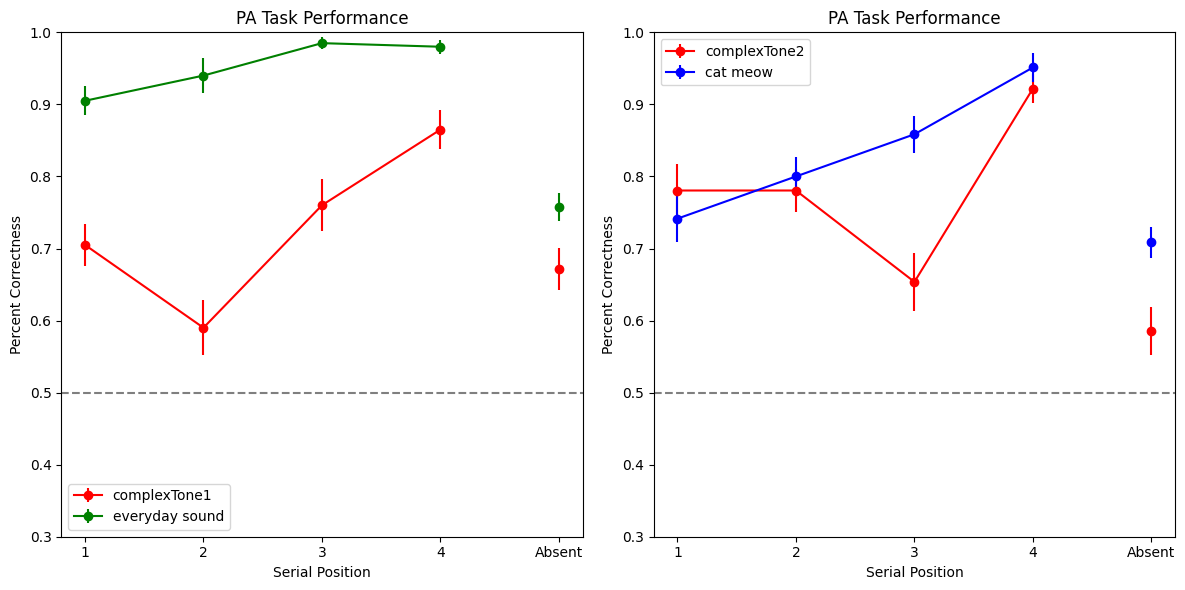

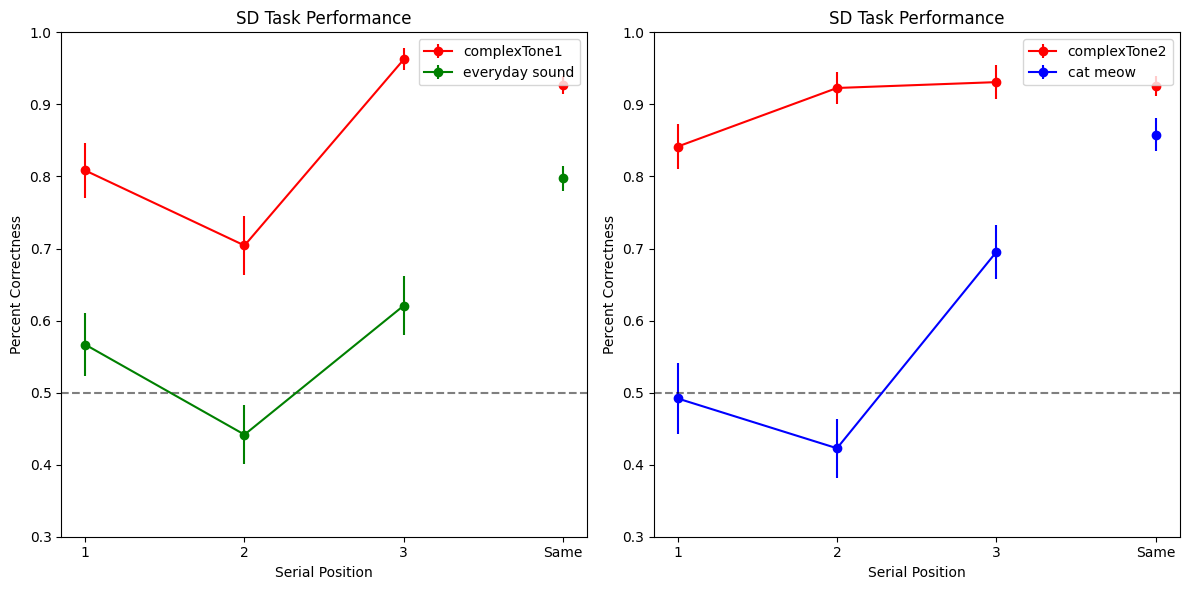

In [11]:
edPth = '/Volumes/T7/CMU LiMN Research/Perceptual Organization/Result & Analysis/10. serial position analysis/Everyday_CompexTone_result'
catPth = '/Volumes/T7/CMU LiMN Research/Perceptual Organization/Result & Analysis/10. serial position analysis/Cat_CompexTone_result'

#only absent and same cases
edPth2 = '/Volumes/T7/CMU LiMN Research/Perceptual Organization/Result & Analysis/10. serial position analysis-/Everyday_CompexTone_result'
catPth2 = '/Volumes/T7/CMU LiMN Research/Perceptual Organization/Result & Analysis/10. serial position analysis-/Cat_CompexTone_result'

# Plot for Present-Absent Task
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_task_performance(edPth, edPth2, 'PA')
plt.subplot(1, 2, 2)
plot_task_performance(catPth, catPth2, 'PA')
plt.tight_layout()
plt.show()

# Plot for Same-Different Task
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_task_performance(edPth, edPth2, 'SD')
plt.subplot(1, 2, 2)
plot_task_performance(catPth, catPth2, 'SD')
plt.tight_layout()
plt.show()